In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from textstat import textstat
from nltk.corpus import stopwords

from src.config import read_train, seed_everything
from src.styles import set_styles, TXT_ACC, TXT_RESET, PALETTE

set_styles()
seed_everything(42)

In [2]:
df_train = read_train()
df_train

,essay_id,full_text,score,label,fold
0,000d118,Many people have car where they live. The thin...,3,2,3.0
1,000fe60,I am a scientist at NASA that is discussing th...,3,2,4.0
2,001ab80,People always wish they had the same technolog...,4,3,1.0
3,001bdc0,"We all heard about Venus, the planet without a...",4,3,0.0
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2,2.0
...,...,...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2,1,4.0
17303,ffddf1f,Technology has changed a lot of ways that we l...,4,3,4.0
17304,fff016d,If you don't like sitting around all day than ...,2,1,4.0
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1,0,0.0


# Target

In [3]:
df_train['score'].value_counts() \
    .sort_index() \
    .to_frame() \
    .style.bar(color=PALETTE[0], width=90, height=50)

,count
score,
1,1252
2,4723
3,6280
4,3926
5,970
6,156


# Essay general statistics

In [15]:
def get_num_words(text):
    return text.count(' ')

def ttr(text):
    # Tokenize text
    tokens = nltk.word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Calculate vocabulary size
    vocab_size = len(set(filtered_tokens))

    # Calculate Type-Token Ratio (TTR)
    total_tokens = len(filtered_tokens)
    ttr = vocab_size / total_tokens if total_tokens > 0 else 0
    return ttr


stat_dict = {'symbol_length':  len,
             'num_words':      get_num_words,
             'flesch_kincaid': textstat.flesch_kincaid_grade,
             'gunning_fog':    textstat.gunning_fog,
             'smog_index':     textstat.smog_index,
             'ttr': ttr}

In [5]:
for feature, mapper in stat_dict.items():
    df_train[feature] = df_train['full_text'].map(mapper)
df_train

,essay_id,full_text,score,label,fold,symbol_length,num_words,flesch_kincaid,gunning_fog,smog_index,ttr
0,000d118,Many people have car where they live. The thin...,3,2,3.0,2677,496,14.7,17.33,11.7,0.697959
1,000fe60,I am a scientist at NASA that is discussing th...,3,2,4.0,1669,327,5.4,7.48,6.8,0.651852
2,001ab80,People always wish they had the same technolog...,4,3,1.0,3077,555,9.9,11.49,11.5,0.591912
3,001bdc0,"We all heard about Venus, the planet without a...",4,3,0.0,2701,446,10.4,11.91,13.2,0.656000
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2,2.0,2208,380,11.8,12.64,13.0,0.541899
...,...,...,...,...,...,...,...,...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2,1,4.0,856,154,7.6,9.72,10.0,0.802632
17303,ffddf1f,Technology has changed a lot of ways that we l...,4,3,4.0,3354,582,11.2,11.42,11.8,0.585526
17304,fff016d,If you don't like sitting around all day than ...,2,1,4.0,1122,212,4.1,6.28,6.4,0.655556
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1,0,0.0,1427,230,10.3,11.66,11.4,0.728682


---------------------------------------------------------------------------------------------------- 
                      DATA 
 ---------------------------------------------------------------------------------------------------- 

 TRAIN     17307 rows, 7 columns


,symbol_length,num_words,flesch_kincaid,gunning_fog,smog_index,ttr,label
0,2677,496,14.7,17.33,11.7,0.697959,2
1,1669,327,5.4,7.48,6.8,0.651852,2
2,3077,555,9.9,11.49,11.5,0.591912,3
3,2701,446,10.4,11.91,13.2,0.656000,3
4,2208,380,11.8,12.64,13.0,0.541899,2
...,...,...,...,...,...,...,...
17302,856,154,7.6,9.72,10.0,0.802632,1
17303,3354,582,11.2,11.42,11.8,0.585526,3
17304,1122,212,4.1,6.28,6.4,0.655556,1
17305,1427,230,10.3,11.66,11.4,0.728682,0




 TEST     17307 rows, 7 columns


,symbol_length,num_words,flesch_kincaid,gunning_fog,smog_index,ttr,label
0,2677,496,14.7,17.33,11.7,0.697959,2
1,1669,327,5.4,7.48,6.8,0.651852,2
2,3077,555,9.9,11.49,11.5,0.591912,3
3,2701,446,10.4,11.91,13.2,0.656000,3
4,2208,380,11.8,12.64,13.0,0.541899,2
...,...,...,...,...,...,...,...
17302,856,154,7.6,9.72,10.0,0.802632,1
17303,3354,582,11.2,11.42,11.8,0.585526,3
17304,1122,212,4.1,6.28,6.4,0.655556,1
17305,1427,230,10.3,11.66,11.4,0.728682,0







---------------------------------------------------------------------------------------------------- 
                      DUPLICATES 
 ---------------------------------------------------------------------------------------------------- 

 TRAIN 
0 duplicated rows out of 17307 (0.0%)


 TEST 
0 duplicated rows out of 17307 (0.0%)





---------------------------------------------------------------------------------------------------- 
                      TARGET 
 ---------------------------------------------------------------------------------------------------- 



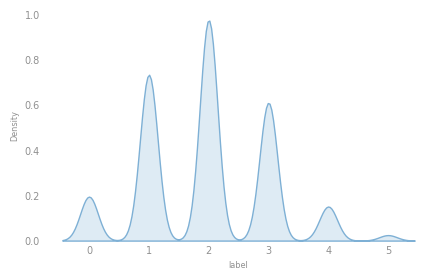






---------------------------------------------------------------------------------------------------- 
                      FEATURES 
 ---------------------------------------------------------------------------------------------------- 

Numerical features with few values:  []


 Categorical features 
no categorical features


 Numerical features 


,nunique,count NaN,mean,min,max,std
smog_index,147,0,10.120847,0.000000,22.100000,1.851764
flesch_kincaid,314,0,8.592529,1.300000,278.600000,5.258949
num_words,851,0,382.879008,147.000000,19310.000000,352.141393
gunning_fog,1614,0,10.245321,3.670000,286.670000,5.358692
symbol_length,3495,0,2071.617265,712.000000,20459.000000,925.910701
ttr,6827,0,0.655289,0.066667,0.958333,0.090844







---------------------------------------------------------------------------------------------------- 
                      CATEGORICAL FEATURES 
 ---------------------------------------------------------------------------------------------------- 

No categorical features





---------------------------------------------------------------------------------------------------- 
                      NUMERICAL FEATURES 
 ---------------------------------------------------------------------------------------------------- 



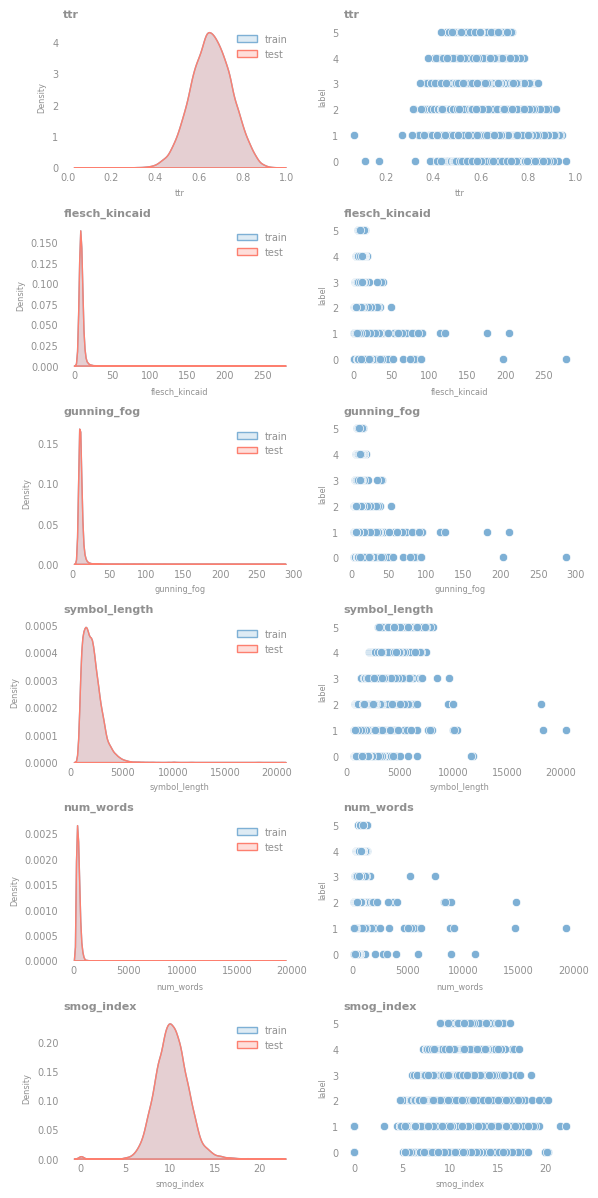






---------------------------------------------------------------------------------------------------- 
                      CORRELATION MATRIX 
 ---------------------------------------------------------------------------------------------------- 



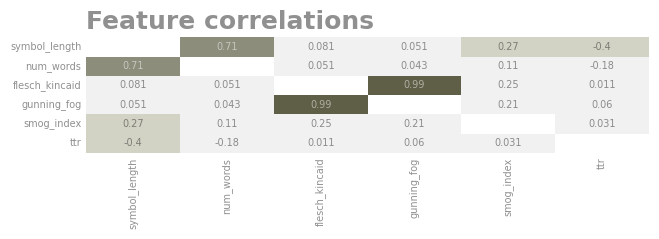






---------------------------------------------------------------------------------------------------- 
                      CORRELATIONS TO TARGET 
 ---------------------------------------------------------------------------------------------------- 



,corr
0,
symbol_length,0.648500
ttr,0.412065
num_words,0.268402
smog_index,0.206356
gunning_fog,0.056958
flesch_kincaid,0.023616


In [16]:
from src.DataExplorer import DataExplorer

path1 = 'textstats.csv'
df_train[[*stat_dict.keys(), 'label', 'essay_id']].rename(columns={'essay_id': 'id'}).to_csv(path1, index=False)

eda = DataExplorer(path1, path1, 'label')
eda.data_at_a_glance()


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)

for fold in range(df_train['fold'].nunique()):
    X_train = df_train.query(f'fold!={fold}')
    Y_train = X_train['label']
    X_train = X_train[stat_dict.keys()]

    X_val = df_train.query(f'fold=={fold}')
    Y_val = X_val['label']
    X_val = X_val[stat_dict.keys()]

    lgb.fit(X_train, Y_train)
    preds = lgb.predict(X_val)

    score = cohen_kappa_score(Y_val, preds, weights='quadratic')

    print(f'Fold {fold}:    {score:.3f}')

Fold 0:    0.675
Fold 1:    0.677
Fold 2:    0.667
Fold 3:    0.664
Fold 4:    0.672
